### This notebook retrains the chosen final model (Random Forest) and evaluates it on the test set.

In [1]:
import pandas as pd
import sys
sys.path.append('../src')
from sklearn.model_selection import train_test_split
from model_evaluation import evaluate_model

df = pd.read_csv("../data/processed/train_clean.csv")

X = df.drop("SeriousDlqin2yrs", axis=1)
y = df["SeriousDlqin2yrs"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

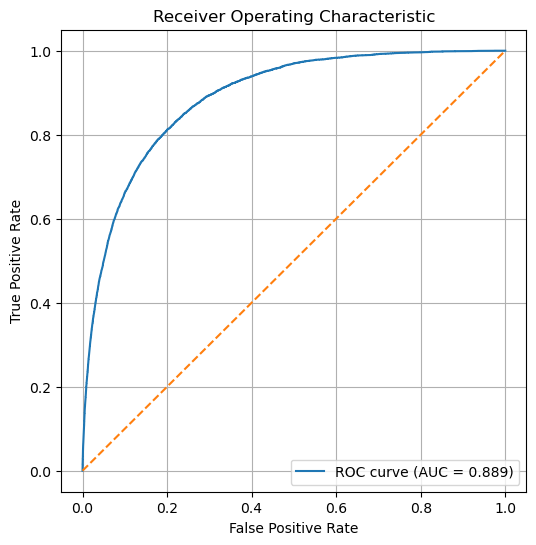

HistGradientBoostingClassifier - Accuracy: 0.8067 | Recall_1: 0.8036 | F1_1: 0.3573 | Roc_Auc: 0.8895


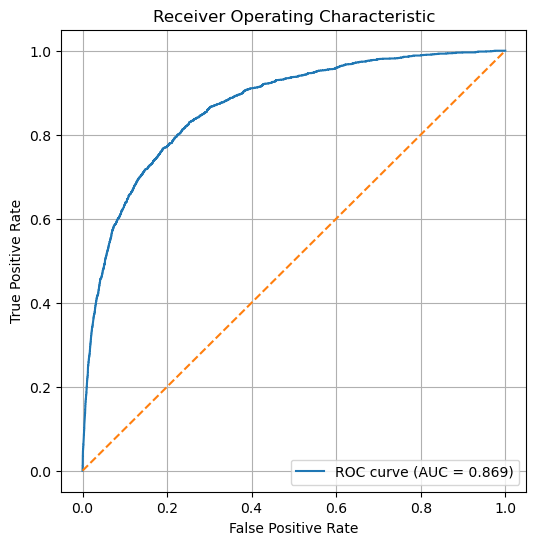

HistGradientBoostingClassifier - Accuracy: 0.8026 | Recall_1: 0.7696 | F1_1: 0.3426 | Roc_Auc: 0.8688


In [2]:
from sklearn.ensemble import HistGradientBoostingClassifier

gb_model = HistGradientBoostingClassifier(class_weight='balanced', max_iter=200, random_state=123)

gb_model.fit(X_train, y_train);

evaluate_model(gb_model, X_train, y_train);
evaluate_model(gb_model, X_test, y_test);

In [5]:
import joblib

joblib.dump(gb_model, '../api/model.pkl')

['../api/model.pkl']

In [4]:
!conda env export > environment.yml